# Lab Assignment 3

## DNA: GC Counting

<b>
Introduction to Computing and Biology<br/>
Bryn Mawr College<br/>
Josh Shapiro and Doug Blank<br/>
</b>

Goals:

* Count from a string
* functions to count form a string (one argument, one output)
* Break long sequence into windows
* keep track of position and GC content
* variables, math & plotting (basic graphics)
* Biology questions
* variation across a genome
* coding vs. noncoding regions
* Is GC appropriate for RNA

Example data from:

http://hgdownload.cse.ucsc.edu/goldenPath/eboVir3/bigZips/

In [1]:
# How many lines/characters does a string contain:

data = "AGCTAGCTAGCTAGCTAGCTAGCTCTATATATATATGCATATATATATATATATATATATATATAT"


## Counting GCs

In [2]:
# Count the GCs:

count = 0
for bp in data:
    if bp in ["G", "C"]:
        count += 1
print(count)

15


In [3]:
# Turn into a function:

def count_gc(data):
    count = 0
    for bp in data:
        if bp in ["G", "C"]:
            count += 1
    return count

print(count_gc(data))

15


In [4]:
# Get GC count in regions:
stepsize = int(len(data)/10)
for i in range(0, len(data), stepsize):
    print(count_gc(data[i:i + stepsize]))

3
3
3
3
1
0
2
0
0
0
0


In [5]:
# Get GC count in regions:
total = 0
stepsize = int(len(data)/10)
for i in range(0, len(data), stepsize):
    count = count_gc(data[i:i + stepsize])
    total += count
print(total)

15


In [6]:
# Get GC count in regions:
counts = []
stepsize = int(len(data)/10)
for i in range(0, len(data), stepsize):
    count = count_gc(data[i:i + stepsize])
    counts.append(count)
print(counts)

[3, 3, 3, 3, 1, 0, 2, 0, 0, 0, 0]


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


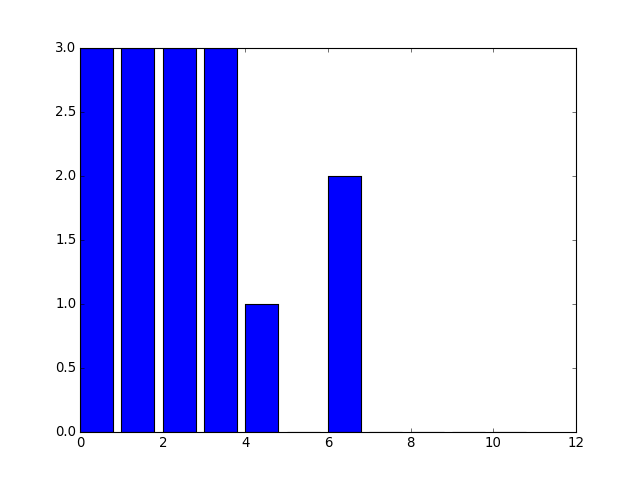

<Container object of 11 artists>

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(range(len(counts)), counts)

## Computing GCs as a percentage

In [9]:
# Turn into a function:

def count_gc(data):
    count = 0
    for bp in data:
        if bp in ["G", "C"]:
            count += 1
    return count/len(data)

print(count_gc(data))

0.22727272727272727


In [10]:
# Get GC count in regions:
counts = []
stepsize = int(len(data)/10)
for i in range(0, len(data), stepsize):
    count = count_gc(data[i:i + stepsize])
    counts.append(count)
print(counts)

[0.5, 0.5, 0.5, 0.5, 0.16666666666666666, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0]


<IPython.core.display.Javascript object>


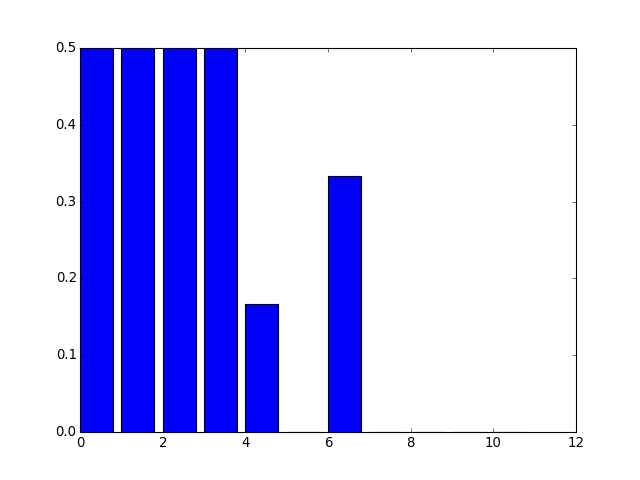

<Container object of 11 artists>

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(range(len(counts)), counts)

## Reading data from a file

In [12]:
# Get the DNA from a file

fp = open("data/ebola.fa")
line = fp.readline()
data = ""
while line:
    line = fp.readline()
    if len(line) > 0 and line[0] != ">":
        data += line.strip()
fp.close()
print(len(data))

18890


In [13]:
# How many lines/characters does a file contain:

fp = open("data/ebola.fa")
line = fp.readline()
print(line)
count = 1
data = ""
while line:
    line = fp.readline()
    count += 1
    data += line
fp.close()
print(count)
print(len(data))

>AB050936v1

272
19159


In [14]:
# Get the DNA from a file

def readDNA(filename):
    fp = open(filename)
    line = fp.readline()
    data = ""
    while line:
        line = fp.readline()
        if len(line) > 0 and line[0] != ">":
            data += line.strip()
    fp.close()
    return data

In [15]:
data = readDNA("data/ebola.fa")

In [16]:
# Get GC count in regions:
counts = []
stepsize = int(len(data)/10)
for i in range(0, len(data), stepsize):
    count = count_gc(data[i:i + stepsize])
    counts.append(count)
print(counts)

[0.4266807834833245, 0.4282689253573319, 0.4139756484912652, 0.46320804658549497, 0.409211222869243, 0.38168343038644786, 0.37586024351508734, 0.41609317098994175, 0.409211222869243, 0.3446267866596083]


<IPython.core.display.Javascript object>


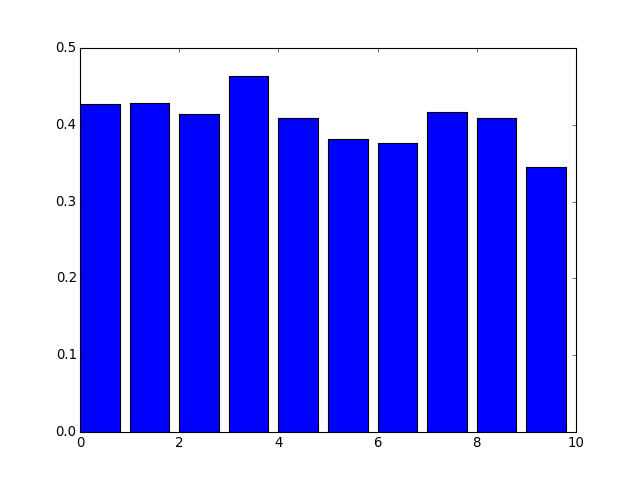

<Container object of 10 artists>

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(range(len(counts)), counts)